In [1]:
### Use KNearestNeighbourRegressor to Predict Price of House.

# Here is the dataset https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt



# Use pandas to get some insights into the data (10 marks)
# Show some interesting visualization of the data (10 marks)
# Manage data for training & testing (20)
# Finding a better value of k (10)

In [2]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:

url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"

data = pd.read_csv(url)

### Exploratory Data Analysis

In [4]:
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [5]:
data.tail()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000
644,648,1376.946,6,7,3,2,1,36000


In [6]:
data.reset_index(drop = True)
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [7]:
data.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [8]:
data.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [9]:
data[data['Sqft'] == 0.00]

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price


In [10]:
data.shape

(645, 7)

In [11]:
data.query('Price <= 0')

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price


In [12]:
data.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [13]:
data.rename(columns = {'Living.Room' : 'Living Room'})

,Sqft,Floor,TotalFloor,Bedroom,Living Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


In [14]:
data['Sqft'].value_counts()

711.600     21
925.080     13
2134.800    11
1707.840    10
2063.640    10
            ..
1106.538     1
882.384      1
665.346      1
1209.720     1
1376.946     1
Name: Sqft, Length: 288, dtype: int64

In [15]:
data['Price'].value_counts()

45000     47
55000     29
36000     25
50000     22
100000    17
          ..
41999      1
23800      1
65999      1
67000      1
24800      1
Name: Price, Length: 153, dtype: int64

In [16]:
data.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


### Data Visualization

In [19]:
import seaborn as sns

<AxesSubplot:>

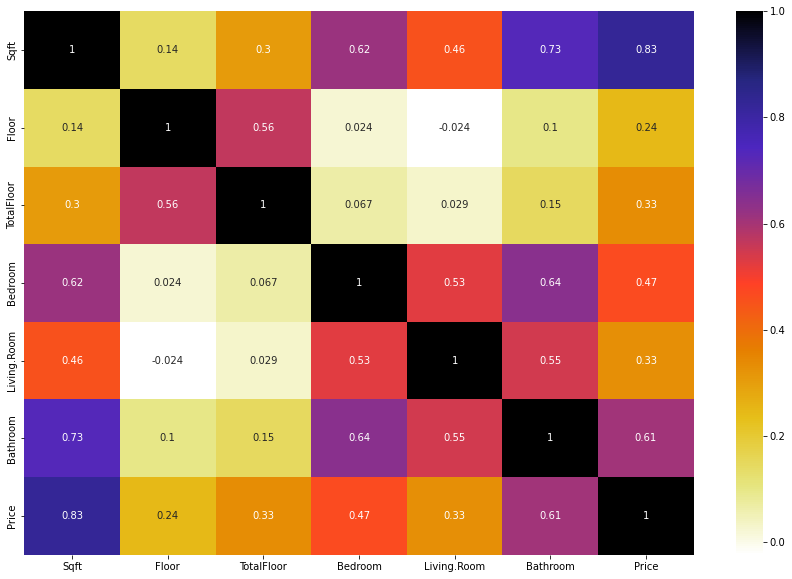

In [20]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True ,cmap=plt.cm.CMRmap_r)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sqft', ylabel='Density'>

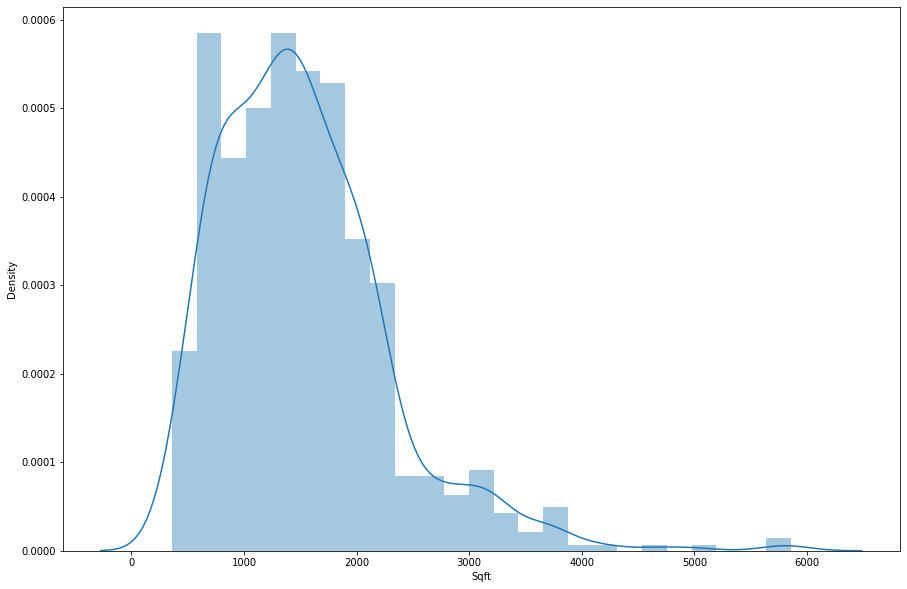

In [21]:
plt.figure(figsize=(15,10))
sns.distplot(data['Sqft'])

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

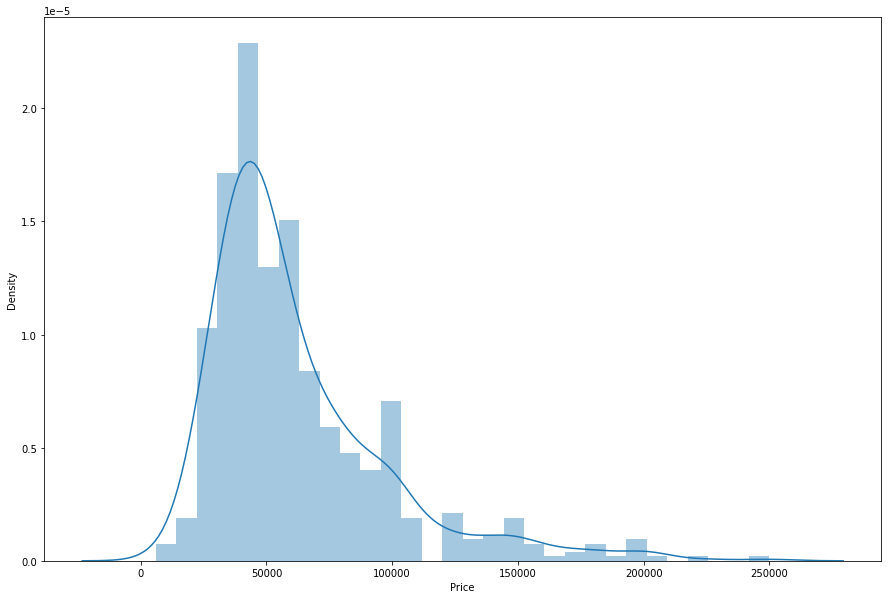

In [22]:
plt.figure(figsize=(15,10))
sns.distplot(data['Price'])

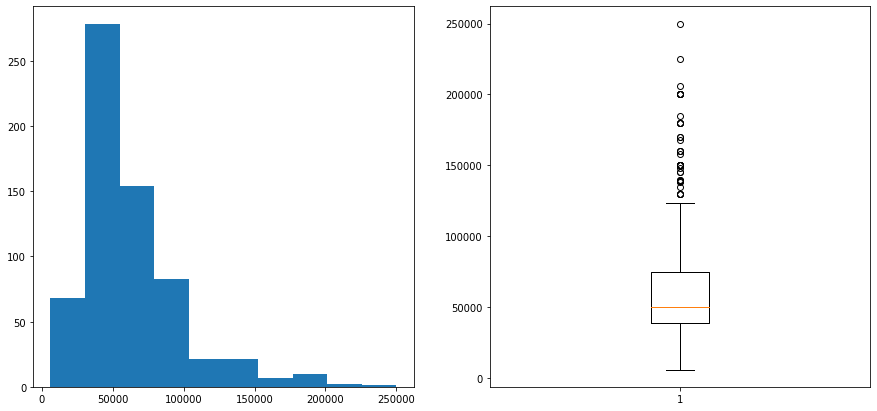

In [23]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = data["Price"]
ax1.hist(x)
ax2.boxplot(x);

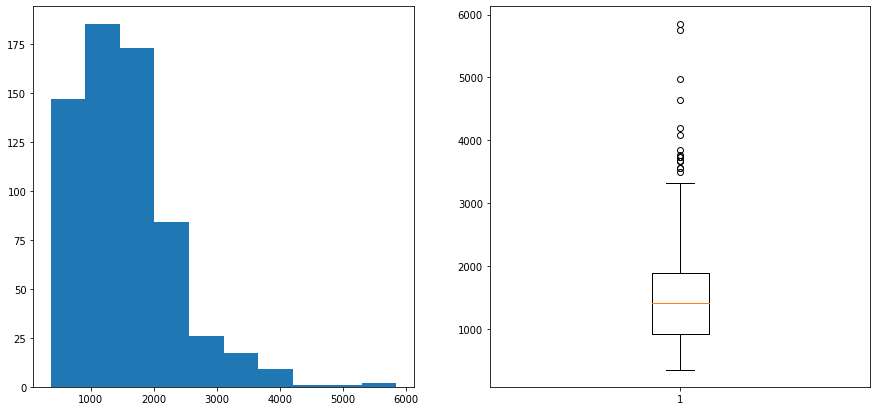

In [24]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
x = data["Sqft"]
ax1.hist(x)
ax2.boxplot(x);

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

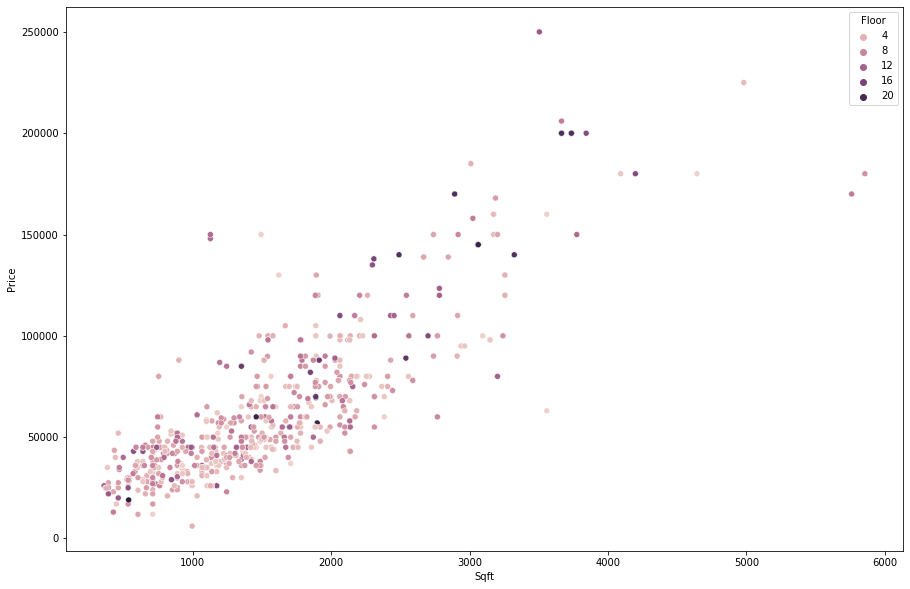

In [25]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = data, x = data['Sqft'], y = data['Price'], hue = 'Floor')

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

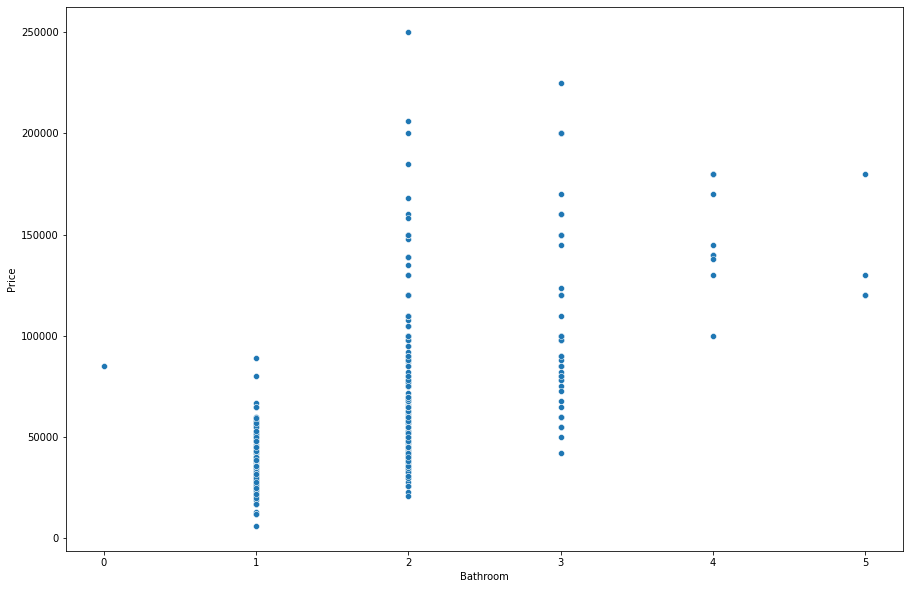

In [26]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = data, x = data['Bathroom'], y = data['Price'])

### Removing Outliers with the help of Z score

In [27]:
from scipy import stats

z = np.abs(stats.zscore(data))
print(z)

         Sqft     Floor  TotalFloor   Bedroom  Living.Room  Bathroom     Price
0    0.456393  1.014897    0.772347  0.828956     0.402694  0.276918  0.000370
1    0.791798  0.242042    0.772347  1.151328     0.402694  0.276918  0.449714
2    0.507434  0.242042    0.772347  0.828956     0.402694  1.187117  0.111966
3    0.089824  1.014897    0.772347  0.161186     0.402694  0.276918  0.477058
4    0.730160  1.303669    0.629803  0.161186     0.402694  0.276918  0.477058
..        ...       ...         ...       ...          ...       ...       ...
640  0.219747  0.273195    0.830110  0.161186     0.402694  0.276918  0.477058
641  1.500419  0.499660    0.171426  1.819099     1.761785  1.187117  1.044355
642  1.027127  1.818907    0.629803  1.819099     1.761785  1.187117  0.477058
643  0.234984  0.757279    0.629803  0.161186     0.402694  0.276918  0.084622
644  0.196547  0.015577    0.772347  0.161186     0.402694  1.187117  0.729814

[645 rows x 7 columns]


In [28]:
print(np.where(z<3))

(array([  0,   0,   0, ..., 644, 644, 644], dtype=int64), array([0, 1, 2, ..., 4, 5, 6], dtype=int64))


In [29]:
data = data[(z<3).all(axis =1 )]

In [30]:
data.shape

(608, 7)

### Dividing dependent and independent features

In [31]:
X = data.drop(labels = ['Price'] , axis = 1)
y = data['Price']

### Train-Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

### Feature Scaling

In [33]:
scaler = MinMaxScaler(feature_range = (0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

### Finding the best value of k and Data Modeling

In [34]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt


In [35]:
rmse = []
for k in range(21):
    k = k+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = sqrt(mean_squared_error(y_test,y_pred))
    rmse.append(error)
    
    print('RMSE for k =',k,'is',error)
    
    

RMSE for k = 1 is 25567.32125899496
RMSE for k = 2 is 22182.041099413407
RMSE for k = 3 is 19508.86652581436
RMSE for k = 4 is 18723.28937328969
RMSE for k = 5 is 17777.633372062643
RMSE for k = 6 is 17554.53404659673
RMSE for k = 7 is 16855.52017037597
RMSE for k = 8 is 17264.132502066943
RMSE for k = 9 is 17332.504602762885
RMSE for k = 10 is 17525.74324116281
RMSE for k = 11 is 17658.011813090234
RMSE for k = 12 is 17385.0941188701
RMSE for k = 13 is 17534.82851103034
RMSE for k = 14 is 17698.694564040667
RMSE for k = 15 is 17847.36279524513
RMSE for k = 16 is 17934.92456011574
RMSE for k = 17 is 18050.664330406707
RMSE for k = 18 is 17919.27276216825
RMSE for k = 19 is 17924.258832446063
RMSE for k = 20 is 18040.126007129627
RMSE for k = 21 is 17977.978954456106


<AxesSubplot:>

<Figure size 1440x1080 with 0 Axes>

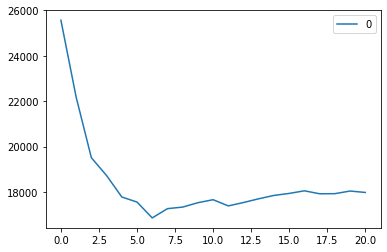

In [37]:

curve = pd.DataFrame(rmse)
curve.plot()

In [39]:
#At k= 6, the RMSE is approximately 17554, and shoots up on further increasing the k value. 
#We can safely say that k=6 will give us the best result in this case.